# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='
units  = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | carauari
Processing Record 5 of Set 1 | jalingo
Processing Record 6 of Set 1 | jingdezhen
Processing Record 7 of Set 1 | turukhansk
Processing Record 8 of Set 1 | arona
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | awbari
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | kushima
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | mount isa
Processing Record 23 of Set 1 | raga
Proces

Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | pacific grove
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | waitati
Processing Record 43 of Set 4 | tokur
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | hanzhong
Processing Record 46 of Set 4 | churapcha
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | qeshm
Processing Record 49 of Set 4 | saskylakh
Processing Record 0 of Set 5 | nouadhibou
Processing Record 1 of Set 5 | srednekolymsk
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | portree
Processing Record 5 of Set 5 | hervey bay
Processing Record 6 of Set 5 | amga
Processing Record 7 of Set 5 | te anau
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 5 | bakel
Processing Record 11 of Set 5 | najran
Processing Record 12 of Set 5 | soro

Processing Record 25 of Set 8 | mabaruma
Processing Record 26 of Set 8 | flin flon
Processing Record 27 of Set 8 | rio gallegos
Processing Record 28 of Set 8 | kupang
Processing Record 29 of Set 8 | pangoa
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | esso
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | yerofey pavlovich
Processing Record 35 of Set 8 | kurchum
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | ivdel
Processing Record 38 of Set 8 | faranah
Processing Record 39 of Set 8 | wagar
Processing Record 40 of Set 8 | arman
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | sakaiminato
Processing Record 45 of Set 8 | san ignacio
Processing Record 46 of Set 8 | lubango
Processing Record 47 of Set 8 | nizhniy tsasuchey
Processing Record 48 of Set 8 | jati
Processing Record

Processing Record 14 of Set 12 | nanchang
Processing Record 15 of Set 12 | cicevac
Processing Record 16 of Set 12 | taburi
City not found. Skipping...
Processing Record 17 of Set 12 | anadyr
Processing Record 18 of Set 12 | inayawan
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | kamariotissa
Processing Record 21 of Set 12 | brigantine
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | mackay
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | marawi
Processing Record 26 of Set 12 | grande prairie
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | kapoeta
Processing Record 30 of Set 12 | ambulu
Processing Record 31 of Set 12 | utiroa
City not found. Skipping...
Processing Record 32 of Set 12 | novaya bryan
Processing Record 33 of Set 12 | los llanos de aridane
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | podporozhye
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,93,100,7.72,AR,1676782080
1,kapaa,22.0752,-159.3190,24.99,88,75,2.06,US,1676782353
2,cape town,-33.9258,18.4232,19.65,81,0,5.66,ZA,1676782194
3,carauari,-4.8828,-66.8958,22.54,99,82,1.28,BR,1676782396
4,jalingo,8.8833,11.3667,21.07,22,14,2.74,NG,1676782397


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,93,100,7.72,AR,1676782080
1,kapaa,22.0752,-159.3190,24.99,88,75,2.06,US,1676782353
2,cape town,-33.9258,18.4232,19.65,81,0,5.66,ZA,1676782194
3,carauari,-4.8828,-66.8958,22.54,99,82,1.28,BR,1676782396
4,jalingo,8.8833,11.3667,21.07,22,14,2.74,NG,1676782397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

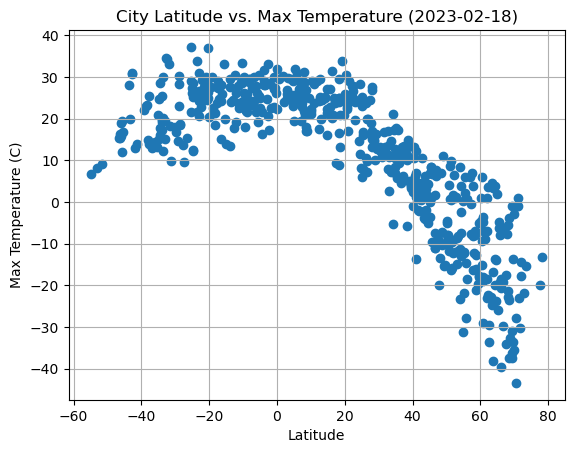

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

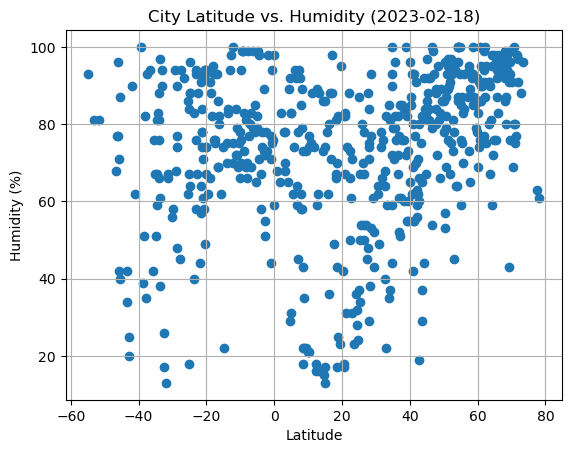

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

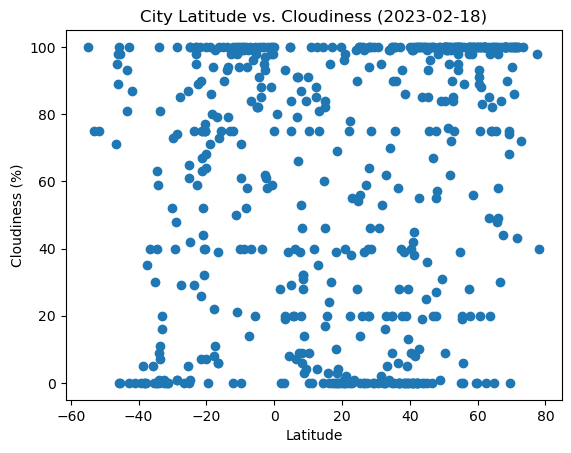

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

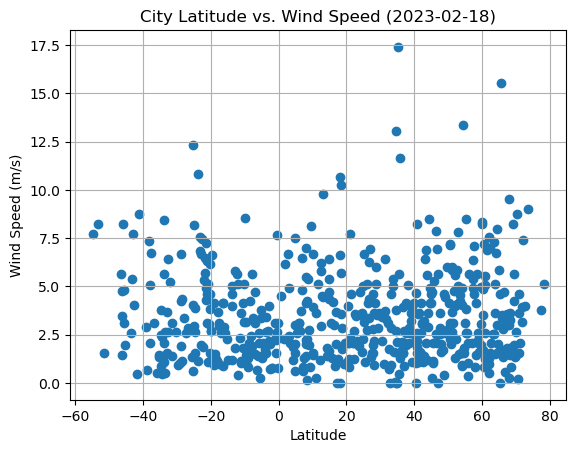

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE